In [185]:
import preprocessing as pp
import pandas as pd
import numpy as np
import time 
# import xpress as xp # FICO Xprerss Solver
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from k_means_constrained import KMeansConstrained
# xp.init('/Applications/FICO Xpress/xpressmp/bin/xpauth.xpr')

In [186]:
customer_df, candidate_df, supplier_df, vehicle_df, distance_w_to_s_df, distance_w_to_c_df, demand_cus_period_df, demand_cus_period_scene_df = pp.read_and_prep_data()

# 2 methods for clustering

customer_df, cluster_center_df = pp.ori_cluster_by_cus_loc(customer_df, n_clusters=400, random_state=42, n_init=10)
# customer_df, cluster_center_df = pp.const_cluster_by_cus_loc(customer_df, n_clusters=100, size_min=4, size_max=400, random_state=42)

agg_dem_cus_period_df = pp.agg_dem_cus_period(demand_cus_period_df,customer_df)

agg_dem_cus_period_scene_df = pp.agg_dem_cus_period_scene(demand_cus_period_scene_df, customer_df)

In [187]:
agg_dem_cus_period_df

0        1        2        3        4        5  \
Cluster ProductIndex                                                        
0       0               13.0     27.0     39.0     46.0     68.0     75.0   
        1               16.0     33.0     49.0     80.0     96.0    100.0   
        2              111.0    174.0    315.0    402.0    500.0    627.0   
        3               12.0     31.0     36.0     50.0     70.0     77.0   
1       0              314.0    543.0    855.0    971.0   1436.0   1703.0   
...                      ...      ...      ...      ...      ...      ...   
398     3               82.0    206.0    230.0    389.0    455.0    577.0   
399     0             1697.0   3952.0   5649.0   6812.0   7583.0   9312.0   
        1             1377.0   2590.0   4818.0   6828.0   8098.0   8411.0   
        2             7640.0  14654.0  19938.0  28589.0  41972.0  47586.0   
        3              593.0   1294.0   2241.0   2448.0   3651.0   4227.0   

                            6        7        8        9  
Cluster ProductIndex                                      
0       0                94.0    102.0    116.0    126.0  
        1               135.0    145.0    163.0    179.0  
        2               778.0    855.0    953.0   1055.0  
        3                89.0    104.0    124.0    137.0  
1       0              1935.0   2387.0   2551.0   2816.0  
...                       ...      ...      ...      ...  
398     3               580.0    694.0    824.0    883.0  
399     0             11303.0  13681.0  15112.0  16957.0  
        1              9696.0  12116.0  13859.0  15053.0  
        2             51140.0  62184.0  71695.0  78937.0  
        3              4389.0   5415.0   6317.0   6762.0  

[1600 rows x 10 columns]

In [188]:
agg_dem=agg_dem_cus_period_scene_df.reset_index()

In [189]:
agg_dem = agg_dem.drop(columns=['Cluster', 'ProductIndex', 'PeriodIndex'])

In [190]:
agg_dem_T=agg_dem.T

In [191]:
agg_dem_T

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,12.0,35.0,48.0,71.0,103.0,108.0,147.0,191.0,155.0,208.0,...,524.0,1262.0,3096.0,3165.0,5685.0,5437.0,7863.0,8854.0,10714.0,12368.0
1,12.0,30.0,35.0,47.0,70.0,79.0,105.0,82.0,90.0,133.0,...,628.0,1316.0,2076.0,2736.0,2866.0,4535.0,4808.0,4837.0,5654.0,5954.0
2,11.0,21.0,34.0,40.0,62.0,74.0,77.0,80.0,104.0,81.0,...,588.0,1468.0,1789.0,1893.0,2701.0,2963.0,3167.0,4896.0,4629.0,5093.0
3,13.0,27.0,49.0,48.0,87.0,79.0,129.0,144.0,160.0,177.0,...,683.0,1306.0,2716.0,2801.0,5031.0,5552.0,5626.0,8392.0,7057.0,8114.0
4,13.0,33.0,39.0,55.0,81.0,89.0,88.0,126.0,146.0,157.0,...,530.0,1220.0,2226.0,2201.0,4108.0,4139.0,5866.0,6962.0,6113.0,8460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.0,23.0,26.0,24.0,34.0,36.0,36.0,30.0,18.0,9.0,...,554.0,1011.0,1574.0,1437.0,1888.0,1540.0,1544.0,1204.0,1162.0,433.0
96,12.0,28.0,54.0,52.0,101.0,98.0,118.0,155.0,227.0,248.0,...,645.0,1420.0,2628.0,3436.0,5318.0,6388.0,5990.0,7674.0,9570.0,11996.0
97,13.0,25.0,48.0,55.0,66.0,83.0,116.0,105.0,128.0,124.0,...,584.0,1428.0,2655.0,2469.0,3732.0,3852.0,4274.0,5609.0,6254.0,8108.0
98,13.0,22.0,37.0,42.0,61.0,60.0,67.0,81.0,91.0,86.0,...,648.0,1041.0,1774.0,2235.0,2861.0,3432.0,3966.0,3299.0,4776.0,4773.0


In [ ]:
from k_means_constrained import KMeansConstrained
import numpy as np
import pandas as pd

def constrained_kmeans_clustering(data, n_clusters=5, size_min=None, size_max=None, random_state=42):

    num_samples = data.shape[0]  # Total number of data points

    # Ensure size_min and size_max are valid
    if size_min is None:
        size_min = 1
    if size_max is None:
        size_max = num_samples // n_clusters  # Set to an approximate even distribution

    # Ensure valid size constraints
    size_min = max(1, min(size_min, num_samples - n_clusters + 1))
    size_max = min(size_max, num_samples)

    # Train K-Means Constrained
    kmeans_constrained = KMeansConstrained(
        n_clusters=n_clusters,
        size_min=size_min,
        size_max=size_max,
        random_state=random_state
    )
    a=kmeans_constrained.fit(data)
    cluster_center_df = pd.DataFrame(kmeans_constrained.cluster_centers_)
    labels = kmeans_constrained.fit_predict(data)  # Get cluster labels

    return labels, cluster_center_df  # ✅ Now returning both labels and model

# Example Usage:
# df = pd.read_csv("your_data.csv")  # Load dataset
# labels, model = constrained_kmeans_clustering(df, n_clusters=5, size_min=5, size_max=20)
# df['Cluster'] = labels  # Add cluster labels to DataFrame


In [193]:
df,cluster_center_df=constrained_kmeans_clustering(agg_dem_T, n_clusters=5, size_min=5, size_max=20, random_state=42)

/Users/arin/miniconda3/envs/Xpress/lib/python3.12/site-packages/k_means_constrained/k_means_constrained_.py:464: RuntimeWarning: invalid value encountered in cast
  costs = np.around(costs * 1000, 0).astype('int32')  # Times by 1000 to give extra precision


In [194]:
cluster_center_df

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,12.85,28.05,39.65,47.60,70.40,72.50,96.10,105.40,116.90,131.45,...,588.60,1339.85,2272.65,2476.8,3669.95,4253.05,4454.70,5330.0,6471.35,6753.35
1,13.70,31.65,48.75,60.40,94.95,107.90,144.15,165.45,190.95,223.60,...,622.70,1421.35,2804.80,3240.1,5083.10,6245.85,6624.05,9051.1,10791.45,11939.90
2,14.20,29.40,42.90,53.45,78.05,90.95,110.25,135.80,154.55,171.25,...,620.40,1392.45,2461.80,2805.7,4429.25,5181.95,5714.10,6947.1,8271.15,9010.10
3,12.05,24.30,34.65,39.30,54.70,57.90,67.60,71.80,78.45,78.10,...,567.10,1159.60,2023.30,2063.7,2871.15,3313.50,3466.80,3894.2,4217.80,4040.55
4,12.45,23.20,30.40,31.00,42.40,38.75,41.65,36.80,33.20,25.65,...,556.15,1110.85,1700.25,1664.2,2270.40,2191.10,1905.25,1998.5,1652.55,1309.35


In [195]:
test2 = cluster_center_df.T

In [196]:
test2.index=agg_dem_cus_period_scene_df.index

In [197]:
test2

0         1        2        3        4
Cluster ProductIndex PeriodIndex                                              
0       0            0              12.85     13.70    14.20    12.05    12.45
                     1              28.05     31.65    29.40    24.30    23.20
                     2              39.65     48.75    42.90    34.65    30.40
                     3              47.60     60.40    53.45    39.30    31.00
                     4              70.40     94.95    78.05    54.70    42.40
...                                   ...       ...      ...      ...      ...
399     3            5            4253.05   6245.85  5181.95  3313.50  2191.10
                     6            4454.70   6624.05  5714.10  3466.80  1905.25
                     7            5330.00   9051.10  6947.10  3894.20  1998.50
                     8            6471.35  10791.45  8271.15  4217.80  1652.55
                     9            6753.35  11939.90  9010.10  4040.55  1309.35

[16000 rows x 5 columns]

In [198]:
import matplotlib.pyplot as plt

/Users/arin/miniconda3/envs/Xpress/lib/python3.12/site-packages/k_means_constrained/k_means_constrained_.py:464: RuntimeWarning: invalid value encountered in cast
  costs = np.around(costs * 1000, 0).astype('int32')  # Times by 1000 to give extra precision


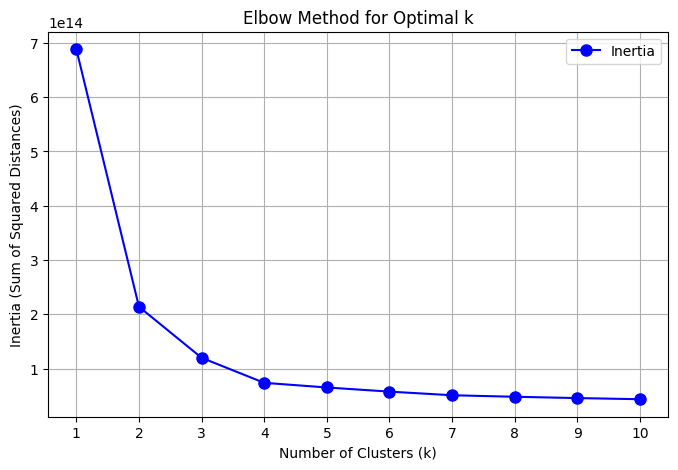

In [199]:
data = agg_dem_T.values  # Convert to numpy array if needed

# Define range of clusters to test
k_values = range(1, 11)  # Try k from 1 to 10
inertia_values = []  # Store inertia values

# Loop over different values of k
for k in k_values:
    model = KMeansConstrained(n_clusters=k, size_min=1, size_max=100, random_state=42)
    model.fit(data)  # Train the model
    inertia_values.append(model.inertia_)  # Store inertia

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-', markersize=8, label="Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [200]:
test=agg_dem_cus_period_scene_df.T

In [201]:
cluster_center_df = pd.DataFrame(cluster_center)

In [202]:
test2 = cluster_center_df.T

In [203]:
test2.index = test.T.index

In [204]:
test.T.index

MultiIndex([(  0, 0, 0),
            (  0, 0, 1),
            (  0, 0, 2),
            (  0, 0, 3),
            (  0, 0, 4),
            (  0, 0, 5),
            (  0, 0, 6),
            (  0, 0, 7),
            (  0, 0, 8),
            (  0, 0, 9),
            ...
            (399, 3, 0),
            (399, 3, 1),
            (399, 3, 2),
            (399, 3, 3),
            (399, 3, 4),
            (399, 3, 5),
            (399, 3, 6),
            (399, 3, 7),
            (399, 3, 8),
            (399, 3, 9)],
           names=['Cluster', 'ProductIndex', 'PeriodIndex'], length=16000)

In [205]:
test2

0         1        2        3        4
Cluster ProductIndex PeriodIndex                                              
0       0            0              12.85     13.70    14.20    12.05    12.45
                     1              28.05     31.65    29.40    24.30    23.20
                     2              39.65     48.75    42.90    34.65    30.40
                     3              47.60     60.40    53.45    39.30    31.00
                     4              70.40     94.95    78.05    54.70    42.40
...                                   ...       ...      ...      ...      ...
399     3            5            4253.05   6245.85  5181.95  3313.50  2191.10
                     6            4454.70   6624.05  5714.10  3466.80  1905.25
                     7            5330.00   9051.10  6947.10  3894.20  1998.50
                     8            6471.35  10791.45  8271.15  4217.80  1652.55
                     9            6753.35  11939.90  9010.10  4040.55  1309.35

[16000 rows x 5 columns]